In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Set date range

In [2]:
# specify the date range we wish to plot
date_range = pd.date_range('01-01-2006', datetime.today().date())

# Load csv

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/collective-action/tech/master/actions.csv")
df["date"] = pd.to_datetime(df["date"])  # cast date col to datetime64
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

,id,date,sources,actions,struggles,employment_types,description,online,locations,companies,workers,tags,author,latlngs,addresses
0,1,1979-09-01,['https://twitter.com/clancynewyork/status/117...,['protest'],['ethics'],['white_collar_workers'],"IBM workers formed an organization, IBM: Speak...",None,['worldwide'],['ibm'],None,['international_solidarity'],['nataliyaned'],None,None
1,2,1986-09-16,['https://www.nytimes.com/1986/09/16/science/s...,['open_letter'],['ethics'],['white_collar_workers'],Fourteen employees at AT&T sign a letter warni...,None,['usa'],['at&t'],14,None,['nataliyaned'],"[(45.5733162, -122.5587111463347)]","['10025, Northeast Cascades Parkway, Portland,..."
2,3,1986-09-16,['https://www.nytimes.com/1986/09/16/science/s...,['open_letter'],['ethics'],['white_collar_workers'],"A group of computer professionals, led by Comp...",None,['usa'],None,30,None,['nataliyaned'],"[(39.7837304, -100.4458825)]",['United States']
3,4,1994-01-24,['https://www.nytimes.com/1994/06/12/magazine/...,['open_letter'],['ethics'],['white_collar_workers'],Computer Professionals for Social Responsibili...,True,None,None,50000,None,['nataliyaned'],None,None
4,5,1998-11-23,['http://www.cnn.com/tech/computing/9811/23/ms...,['legal_action'],"['unfair_labor_practices', 'pay_and_benefits']",['contract_workers'],A law firm representing 10 current and former ...,None,['usa'],['microsoft'],10,None,['organizejs'],"[(35.139622349999996, -80.92306993327955)]","['Microsoft, Yorkwood, Charlotte, Mecklenburg ..."


# Clean Text

In [4]:
df["struggles"] = df["struggles"].astype(str).str.strip("[]\'\'")
df["actions"] = df["actions"].astype(str).str.strip("[]\'\'")
df["companies"] = df["companies"].astype(str).str.strip("[]\'\'")
df["employment_types"] = df["employment_types"].astype(str).str.strip("[]\'\'")
df["sources"] = df["sources"].astype(str).str.strip("[]\'\'")
df["tags"] = df["tags"].astype(str).str.strip("[]\'\'")
df["locations"] = df["locations"].astype(str).str.strip("[]\'\'")

df["struggles"] = df["struggles"].astype(str).str.replace("'", "")
df["actions"] = df["actions"].astype(str).str.replace("'", "")
df["companies"] = df["companies"].astype(str).str.replace("'", "")
df["employment_types"] = df["employment_types"].astype(str).str.replace("'", "")
df["sources"] = df["sources"].astype(str).str.replace("'", "")
df["tags"] = df["tags"].astype(str).str.replace("'", "")
df["locations"] = df["locations"].astype(str).str.replace("'", "")

In [5]:
df.head()

,id,date,sources,actions,struggles,employment_types,description,online,locations,companies,workers,tags,author,latlngs,addresses
0,1,1979-09-01,https://twitter.com/clancynewyork/status/11758...,protest,ethics,white_collar_workers,"IBM workers formed an organization, IBM: Speak...",None,worldwide,ibm,None,international_solidarity,['nataliyaned'],None,None
1,2,1986-09-16,https://www.nytimes.com/1986/09/16/science/sof...,open_letter,ethics,white_collar_workers,Fourteen employees at AT&T sign a letter warni...,None,usa,at&t,14,None,['nataliyaned'],"[(45.5733162, -122.5587111463347)]","['10025, Northeast Cascades Parkway, Portland,..."
2,3,1986-09-16,https://www.nytimes.com/1986/09/16/science/sof...,open_letter,ethics,white_collar_workers,"A group of computer professionals, led by Comp...",None,usa,None,30,None,['nataliyaned'],"[(39.7837304, -100.4458825)]",['United States']
3,4,1994-01-24,https://www.nytimes.com/1994/06/12/magazine/ba...,open_letter,ethics,white_collar_workers,Computer Professionals for Social Responsibili...,True,None,None,50000,None,['nataliyaned'],None,None
4,5,1998-11-23,http://www.cnn.com/tech/computing/9811/23/mste...,legal_action,"unfair_labor_practices, pay_and_benefits",contract_workers,A law firm representing 10 current and former ...,None,usa,microsoft,10,None,['organizejs'],"[(35.139622349999996, -80.92306993327955)]","['Microsoft, Yorkwood, Charlotte, Mecklenburg ..."


# Visualizations

In [6]:
'''
Function: vizcolumn(df, col, limit = None, include = None, remove = None, printlabels = False)
- df: Properly cleaned and formatted pandas dataframe.
- col: Column of interest in `df`.
- limit: Default `None`, will output all labels. The max number of labels in outputted chart.
- include: Default `None`. List of specific columns to include. 
  The number of labels to be included has to be less than `limit`, if defined.
- remove: Default `None`. List of specific columns to not include.
- printLabels: Default `False`. Print list of unique labels.

Output: None

Prints: Error messages or chart
'''

def vizcolumn(df, col, limit = None, include = None, remove = None, printLabels = False):
    '''Error Checking'''
    if not col in df.columns:
        print(col + "is not a column in df.")
        return None
    
    if (limit or limit == 0 or limit) and include:
        if len(include) > limit:
            print("Number of labels to include is greater than the given label limit.")
            return None
    
    if include and remove:
        union = include.extend(remove)
        if not len(set(union)) == len(include) + len(remove):
            print("Columns cannot be both included and removed.")
            return None
    
    '''Obtaining unique label values, checking the labels in `include`, 
    and removing the labels in `remove`'''
    lst = []
    for i in df[col].unique():
        lst.extend(i.split(", "))
        
    lst = list(set(lst))
    
    # Supplementary Error Checking
    if include:
        for i in include:
            if not i in lst:
                print(i + "is not an available label.")
                return None
    
    if remove:
        for r in remove:
            try:
                lst.remove(r)
            except ValueError:
                pass
            
    '''Print list of unique labels, if desired'''
    if printLabels:
        print(lst)
    
    ''' Counting instances of all label values'''
    count = []
    for i in lst:
        count.append(sum(df[col].str.contains(i)))

    '''Limiting to desired number of labels, including specified labels'''
    include_list = []
    include_count = []
    if include:
        if include:
            for i in include:
                ind = lst.index(i)
                lst.remove(i)
                include_list.append(i)
                
                i_count = count.pop(ind)
                include_count.append(i_count)
        limit = limit - len(include)

    if limit:                
        sorted_list = sorted(zip(lst, count), key = lambda x: x[1], reverse = True)
        sorted_list = sorted_list[:limit]
        
        lst, count = [], []
        for i, j in sorted_list:
            lst.append(i)
            count.append(j)
            
    lst.extend(include_list)
    count.extend(include_count)
    
    '''Print plot'''
    col_df = pd.DataFrame({col: lst, "count": count})
    
    col_df.plot(kind = "barh", x = col, y = "count", title = "Number of Occurrence by " + col)
    plt.show()

## Actions

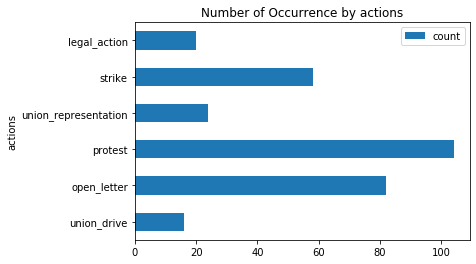

In [7]:
vizcolumn(df, "actions")

In [8]:
df.groupby("actions").count()["id"]

actions
legal_action                         18
legal_action, protest                 1
open_letter                          70
open_letter, legal_action             1
open_letter, protest                  2
open_letter, strike                   4
protest                              90
protest, open_letter                  4
protest, strike                       2
strike                               45
strike, open_letter                   1
strike, protest                       5
strike, union_drive                   1
union_drive                          14
union_representation                 23
union_representation, union_drive     1
Name: id, dtype: int64

## Employment Types

In [9]:
df.groupby(["employment_types"]).count()["id"]

employment_types
blue_collar_workers                                   37
blue_collar_workers, contract_workers                  7
blue_collar_workers, gig_workers                       2
blue_collar_workers, in_house_workers                  9
blue_collar_workers, white_collar_workers              1
contract_workers                                      12
contract_workers, blue_collar_workers                  5
contract_workers, gig_workers                          4
contract_workers, white_collar_workers                 1
gig_workers                                           62
gig_workers, blue_collar_workers                       1
in_house_workers                                       2
in_house_workers, blue_collar_workers                 10
in_house_workers, blue_collar_workers, gig_workers     1
na                                                    30
white_collar_workers                                  85
white_collar_workers, blue_collar_workers              2
white_collar_w

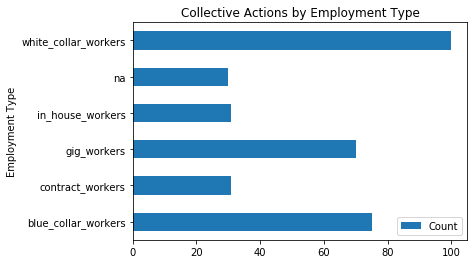

In [10]:
workers = ['blue_collar_workers', 'contract_workers', 'gig_workers', 'in_house_workers', 'na', 'white_collar_workers']

workers_count = []
for w in workers:
    workers_count.append(sum(df["employment_types"].str.contains(w)))
    
workers_df = pd.DataFrame({"Employment Type": workers, "Count": workers_count})

workers_df.plot(kind = "barh", x = "Employment Type", y = "Count", title = "Collective Actions by Employment Type")
plt.show()

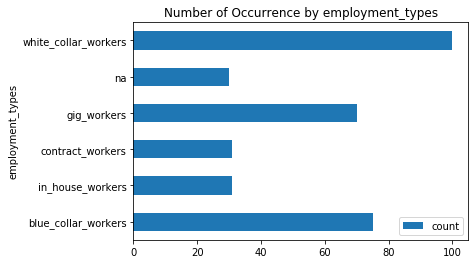

In [11]:
vizcolumn(df, "employment_types")

## Struggles

In [12]:
df.groupby(["struggles"]).count()["id"].index

Index(['discrimination', 'discrimination, ethics',
       'discrimination, pay_and_benefits', 'ethics', 'ethics, discrimination',
       'ethics, working conditions',
       'ethics, working conditions, unfair_labor_practices', 'job_security',
       'job_security, discrimination', 'job_security, pay_and_benefits',
       'job_security, working conditions, pay_and_benefits', 'na',
       'pay_and_benefits', 'pay_and_benefits, discrimination',
       'pay_and_benefits, job_security',
       'pay_and_benefits, unfair_labor_practices',
       'pay_and_benefits, working conditions',
       'pay_and_benefits, working conditions, unfair_labor_practices',
       'unfair_labor_practices', 'unfair_labor_practices, job_security',
       'unfair_labor_practices, pay_and_benefits', 'working conditions',
       'working conditions, discrimination',
       'working conditions, job_security',
       'working conditions, pay_and_benefits',
       'working conditions, unfair_labor_practices'],
      dt

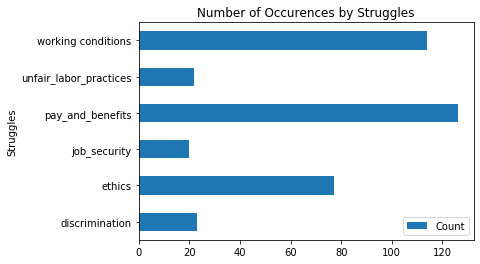

In [13]:
struggles = ['discrimination', 'ethics', 'job_security', 'pay_and_benefits', 
             'unfair_labor_practices', 'working conditions']

struggles_count = []
for s in struggles:
    struggles_count.append(sum(df["struggles"].str.contains(s)))
    
struggles_df = pd.DataFrame({"Struggles": struggles, "Count": struggles_count})

struggles_df.plot(kind = "barh", x = "Struggles", y = "Count", title = "Number of Occurences by Struggles")
plt.show()

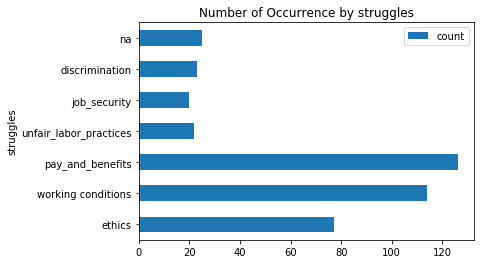

In [14]:
vizcolumn(df, "struggles")

## Workers

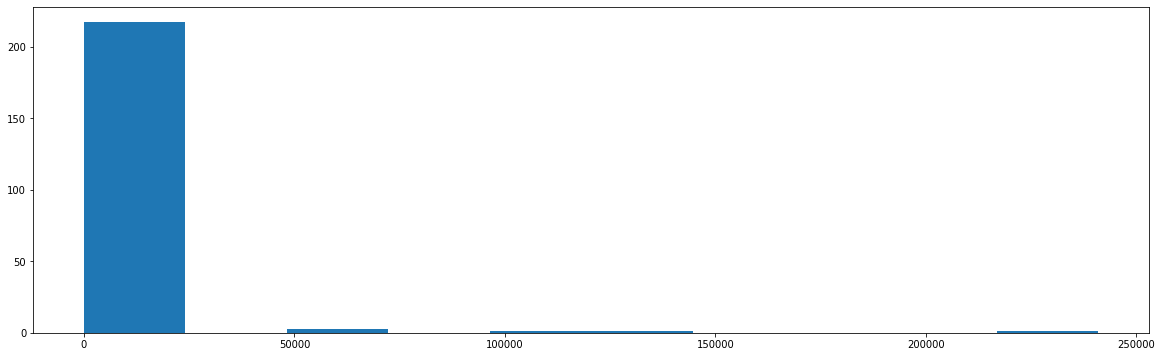

In [15]:
plt.figure(figsize = (20, 6))
workers_as_int = [int(i) for i in df[~(df["workers"] == "None")]["workers"].values]
plt.hist(workers_as_int)
plt.show()

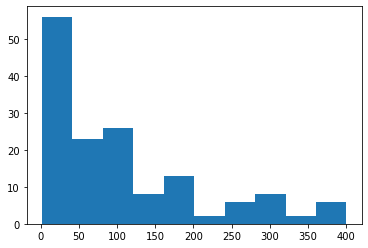

In [16]:
plt.hist(sorted(workers_as_int)[:150])
plt.show()

## Companies

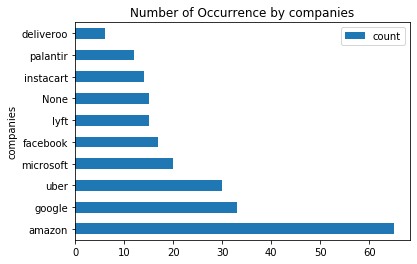

In [17]:
vizcolumn(df, "companies", limit = 10)

## Tags

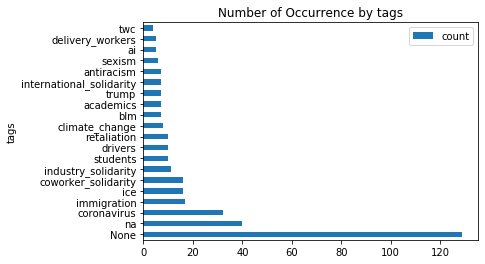

In [18]:
vizcolumn(df, "tags", limit = 20)

## Locations

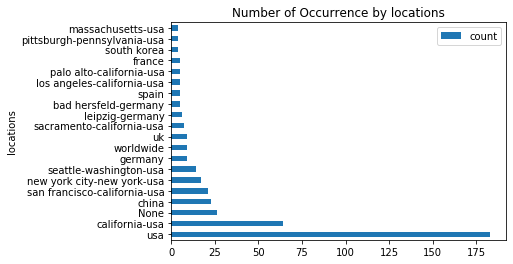

In [19]:
vizcolumn(df, "locations", limit = 20)

## Addresses

In [20]:
df.groupby(["addresses"]).count()

,id,date,sources,actions,struggles,employment_types,description,online,locations,companies,workers,tags,author,latlngs
addresses,,,,,,,,,,,,,,
None,89,89,89,89,89,89,89,89,89,89,89,89,89,89
"[""Amazon.fr ORY1, Rue de l'Olivier, Deret Logistique, Saran, Orléans, Loiret, Centre-Val de Loire, France métropolitaine, 45770, France"", 'Amazon, Rue de Charenton, Quartier de Bercy, Paris, Île-de-France, France métropolitaine, 75012, France']",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"[""Amazon.fr ORY1, Rue de l'Olivier, Deret Logistique, Saran, Orléans, Loiret, Centre-Val de Loire, France métropolitaine, 45770, France""]",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"['1, 东长安街, 北京市, 东城区, 北京市, 100010, China 中国']",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"['10025, Northeast Cascades Parkway, Portland, Multnomah County, Oregon, 97220, United States of America']",1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"['华三通信, 长河街道, 杭州市, 浙江省, China 中国']",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"['华为技术有限公司, 龙岗区, 深圳市, 广东省, 518100, China 中国']",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"['甲骨文大厦, 软件园三号路, 中关村软件园, 东北旺村, 海淀区, 北京市, 100093, China 中国']",1,1,1,1,1,1,1,1,1,1,1,1,1,1
